# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

## Load Data

In [1]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# Load Data 
data = pd.read_csv("/content/drive/MyDrive/ToBigs/Regression/assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## Data Preprocessing

### Drop Data
- 의미없는 column값(unnamed:0) 제거



In [4]:
data.drop('Unnamed: 0', inplace = True, axis=1)

### Check Data
- 데이터 확인

In [5]:
data.shape

(6019, 13)

In [6]:
data.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3664,Ford Ecosport 1.5 DV5 MT Titanium Optional,Pune,2015,55000,Diesel,Manual,First,22.7 kmpl,1498 CC,89.84 bhp,5.0,NaN,7.50
2606,Maruti Ciaz ZDi Plus,Kolkata,2015,62144,Diesel,Manual,Second,26.21 kmpl,1248 CC,88.5 bhp,5.0,NaN,5.75
4784,Ford Fiesta 1.4 ZXi TDCi ABS,Chennai,2009,76000,Diesel,Manual,First,17.8 kmpl,1399 CC,68 bhp,5.0,NaN,2.75
5443,Skoda Octavia Ambiente 1.9 TDI MT,Coimbatore,2011,75378,Diesel,Manual,First,18.7 kmpl,1896 CC,66 bhp,5.0,NaN,3.59
1302,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,57456,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,21.56
1303,BMW 5 Series 520d Luxury Line,Coimbatore,2012,44450,Diesel,Automatic,First,22.48 kmpl,1995 CC,190 bhp,5.0,71.82 Lakh,24.68
3553,Maruti Alto 800 2016-2019 CNG LXI,Pune,2015,18000,CNG,Manual,First,33.44 km/kg,796 CC,40.3 bhp,4.0,NaN,3.00
3335,Toyota Corolla Altis 2008-2013 1.8 VL AT,Mumbai,2010,63298,Petrol,Automatic,First,14.53 kmpl,1794 CC,138.1 bhp,5.0,NaN,3.95
769,Tata Indica V2 eLS,Hyderabad,2016,73000,Diesel,Manual,First,25.0 kmpl,1396 CC,69 bhp,5.0,NaN,2.20
1640,Toyota Innova 2.5 G (Diesel) 7 Seater,Coimbatore,2013,80544,Diesel,Manual,First,12.99 kmpl,2494 CC,100.6 bhp,7.0,NaN,11.79


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


**Output**

(1) 단위때문에 문자형으로 취급받는 수치형 변수가 있음
- 변수 타입 변경 필요함

(2) Mileage, Engine, Power, Seats, New_Price에 결측치가 있음
- 결측치 제거 필요함

### Change Dtype
- 변수 타입 변경

In [8]:
data['Mileage'] = data['Mileage'].str.replace(" km/kg","")
data['Mileage'] = data['Mileage'].str.replace(" kmpl","")
data['Engine'] = data['Engine'].str.replace(" CC","")

data['Power'] = data['Power'].str.replace(" bhp","")
data['Power'] = data['Power'].apply(lambda x: None if x == "null" else x)
data['Power'] = data['Power'].apply(lambda x: None if x == "" else x)

data['Mileage'] = pd.to_numeric(data['Mileage'])
data['Engine'] = pd.to_numeric(data['Engine'])
data['Power'] = pd.to_numeric(data['Power'])

In [15]:
data["Company"] = data["Name"].str.split().str[0]

In [16]:
data.drop('Name', inplace = True, axis=1)

In [30]:
data = data.drop(['Location','Fuel_Type', 'Transmission', 'Owner_Type', 'Year', 'Seats', 'Company'], axis=1)

### Eliminate missing value
- 결측치 제거

In [9]:
# New_Price는 결측치가 많으므로 아예 cloumn을 제거함

data.drop('New_Price', inplace = True, axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [11]:
data[data['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,NaN,1.93


In [12]:
data[data['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5.0,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,NaN,5.0,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,1.20
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.0,NaN,NaN,1.75
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,NaN,5.0,2.85
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.00,2112.0,NaN,6.0,1.70


In [13]:
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,3.60
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,40.88
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,1.70


In [17]:
# Engine이나 Seats의 경우 해당 값이 null이면 Engine, Seats, Power 값이 null 인 경우가 많으므로 해당 변수가 결측치인 경우 행을 삭제함

data = data.dropna(subset=['Engine'])
data = data.dropna(subset=['Seats'])

# Power의 값은 회사별 평균으로 계산하여 결측치를 처리함

data = data.groupby('Company').apply(lambda x: x.fillna(x.mean()))

In [18]:
data

Location  Year  Kilometers_Driven Fuel_Type Transmission  \
Company                                                                       
Ambassador 1221     Chennai  2003              80000    Diesel       Manual   
Audi       4     Coimbatore  2013              40670    Diesel    Automatic   
           22        Mumbai  2015              55985    Petrol    Automatic   
           33       Kolkata  2010              35000    Diesel    Automatic   
           50         Kochi  2015              13648    Diesel    Automatic   
...                     ...   ...                ...       ...          ...   
Volvo      4429   Hyderabad  2012              86000    Diesel    Automatic   
           4497       Kochi  2014             102001    Diesel    Automatic   
           4788   Hyderabad  2015              38000    Diesel    Automatic   
           5583       Kochi  2014              93144    Diesel    Automatic   
           5762   Hyderabad  2014              51000    Diesel    Automatic   

                Owner_Type  Mileage  Engine   Power  Seats  Price     Company  
Company                                                                        
Ambassador 1221      Third    12.80  1489.0   35.50    5.0   1.35  Ambassador  
Audi       4        Second    15.20  1968.0  140.80    5.0  17.74        Audi  
           22        First    13.53  1984.0  177.01    5.0  23.50        Audi  
           33        First    12.40  2698.0  179.50    5.0  11.50        Audi  
           50        First    17.11  1968.0  174.33    5.0  21.43        Audi  
...                    ...      ...     ...     ...    ...    ...         ...  
Volvo      4429     Second    14.70  1985.0  163.00    5.0  18.25       Volvo  
           4497      First    11.10  2400.0  200.00    7.0  23.58       Volvo  
           4788     Second    16.80  1969.0  150.00    5.0  24.00       Volvo  
           5583      First    14.70  1984.0  181.00    5.0  17.15       Volvo  
           5762      First    27.03  1969.0  190.00    5.0  21.50       Volvo  

[5977 rows x 12 columns]

# EDA

## Check linearity

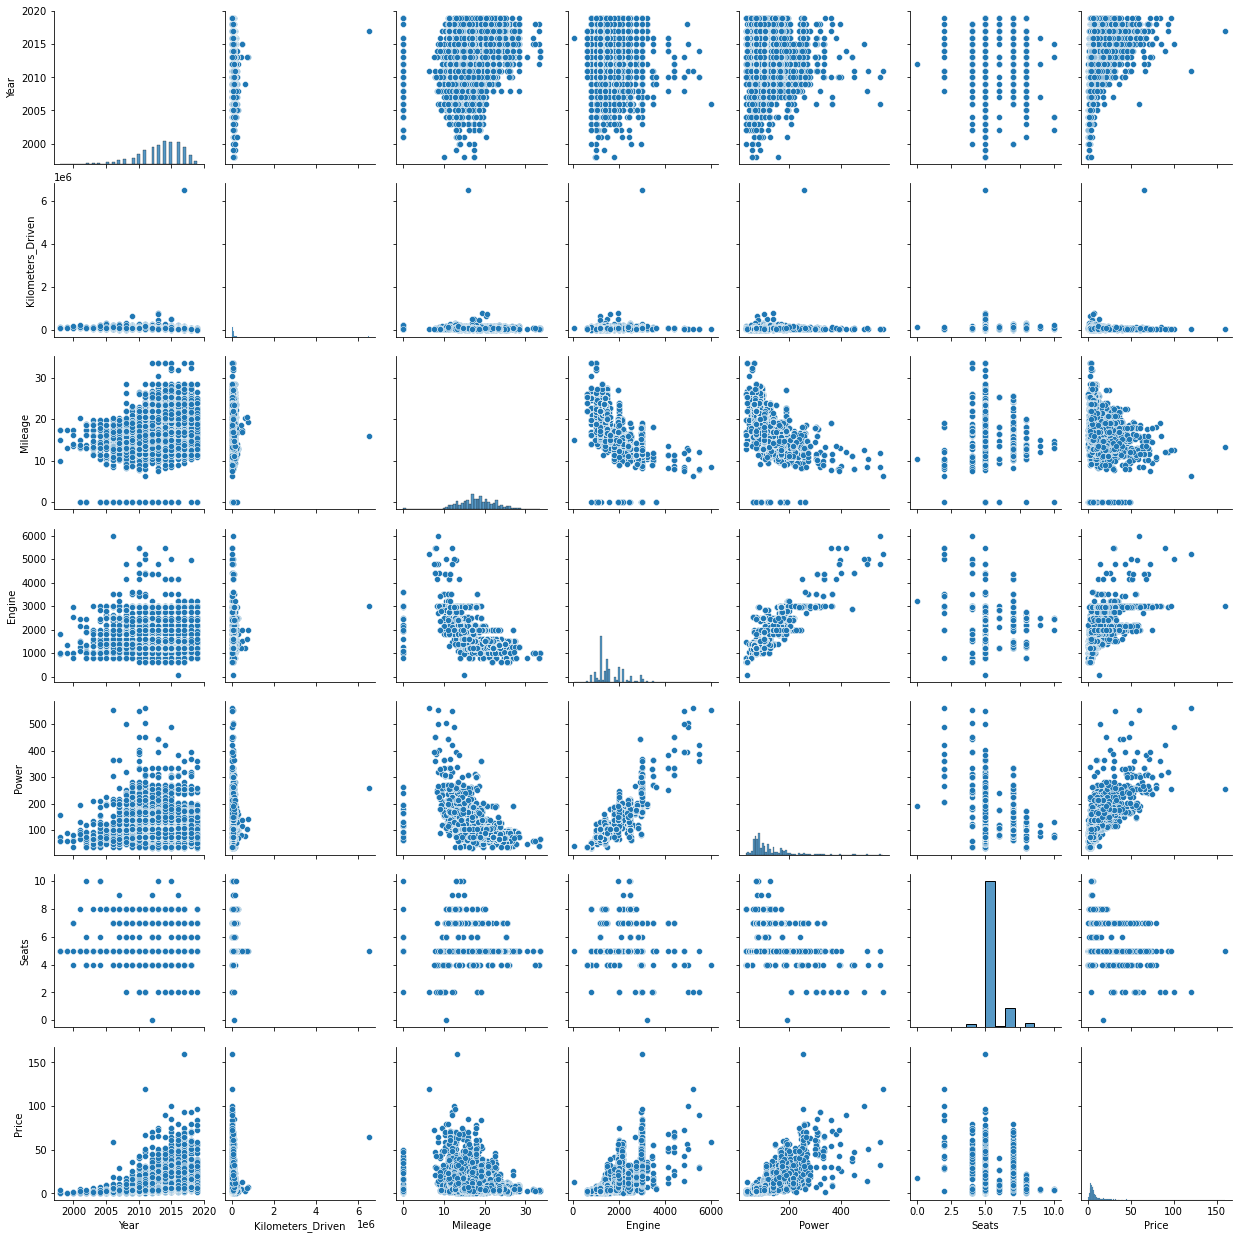

In [20]:
sns.pairplot(data)

## Check correlation

In [32]:
X = data.drop(['Price'], axis=1)
y = data.Price

In [23]:
X.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
Year,1.000000,-0.172639,0.314365,-0.052886,0.021097,0.012333
Kilometers_Driven,-0.172639,1.000000,-0.064951,0.090814,0.032071,0.083113
Mileage,0.314365,-0.064951,1.000000,-0.597985,-0.508922,-0.308101
Engine,-0.052886,0.090814,-0.597985,1.000000,0.864490,0.393337
Power,0.021097,0.032071,-0.508922,0.864490,1.000000,0.094925
Seats,0.012333,0.083113,-0.308101,0.393337,0.094925,1.000000


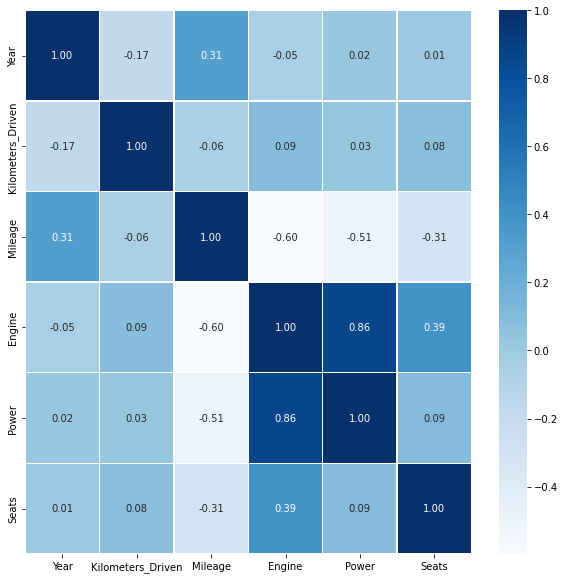

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(data = X.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

**Output**

Engine과 Power가 높은 상관관계를 보이고 있다.

### Check Correlation with Price

In [33]:
data.corr()['Price'].sort_values(ascending=False)

Price                1.000000
Power                0.772535
Engine               0.658616
Kilometers_Driven   -0.011276
Mileage             -0.313918
Name: Price, dtype: float64

**Output**

Engine과 Power가 살짝 높은 상관관계를 보이고 있으므로 주의할 것!

# Modeling

## Sklearn Linear Regression

In [26]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [36]:
pred = model.predict(X_train)

In [37]:
model.score(X_train, y_train)

0.6039278016805161

In [38]:
mean_squared_error(y_train, pred)

49.95192523824175

In [39]:
print(model.coef_) # 추정된 회귀계수 (intercept제외)
print(model.intercept_) # intercept

[-2.62504890e-06  2.81951528e-01  9.79576225e-04  1.65076830e-01]
-15.679430321790424
